In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



In [29]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,240,255,0)
imgray = cv2.GaussianBlur(imgray,(5,5),0)


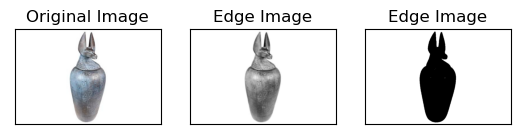

In [30]:
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img0=im.copy()
img1=im.copy()
img0 = cv2.drawContours(img0, contours, 6, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 7, (255,0,0), 3)




In [32]:
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

In [33]:
print(size)

[(0, 4), (1, 6), (2, 4), (3, 4), (4, 4), (5, 4), (6, 585), (7, 5), (8, 2), (9, 1), (10, 1)]


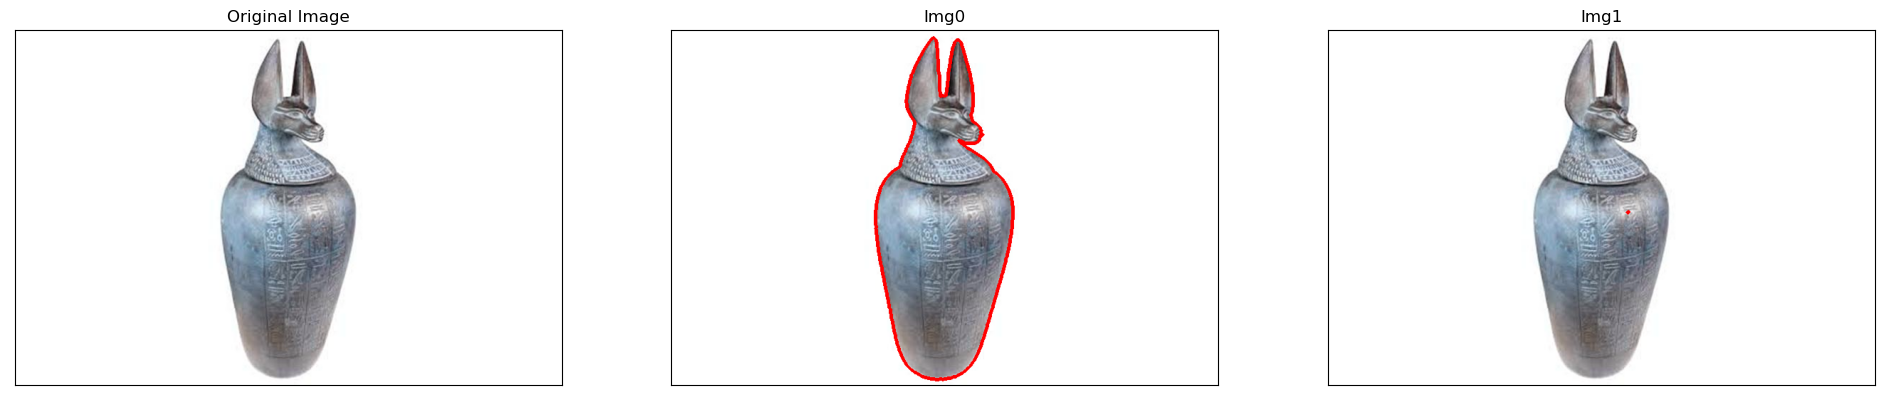

In [34]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Img0'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Img1'), plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)


{'m00': 383731.0, 'm10': 147544569.5, 'm01': 95740884.5, 'm20': 75641182630.33333, 'm11': 36812370090.25, 'm02': 31849800910.333332, 'm30': 43626052082044.75, 'm21': 18872475066268.168, 'm12': 12246248450023.166, 'm03': 11919787990692.25, 'mu20': 18910295657.58333, 'mu11': 0.0, 'mu02': 7962450227.583332, 'mu30': 0.0078125, 'mu21': 0.0029296875, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.12842351369405475, 'nu11': 0.0, 'nu02': 0.05407455570004334, 'nu30': 8.564910256915514e-17, 'nu21': 3.211841346343318e-17, 'nu12': 0.0, 'nu03': 0.0}


In [36]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [37]:
img0 = cv2.rectangle(img0,(cx-2,cy-2),(cx+2,cy+2),(255,0,0),2)


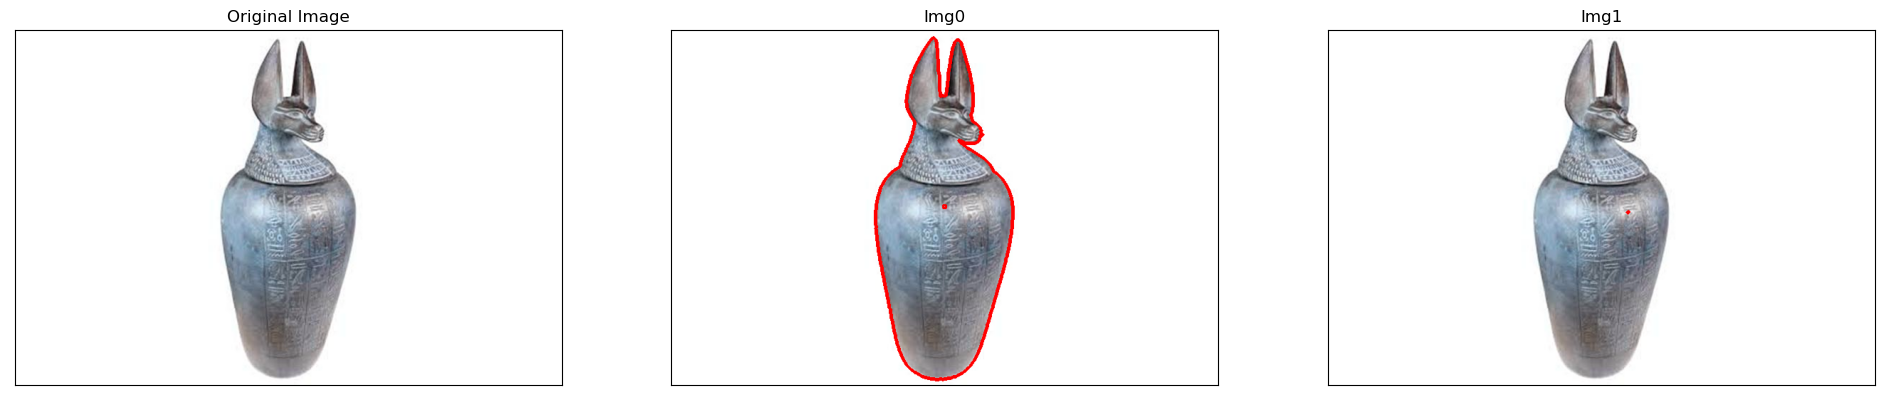

In [38]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Img0'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Img1'), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
print(perimeter)


2536.0


In [40]:
print(approx)

[[[  0   0]]

 [[  0 499]]

 [[769 499]]

 [[769   0]]]


In [43]:
img = cv2.imread('opencv_logo2.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

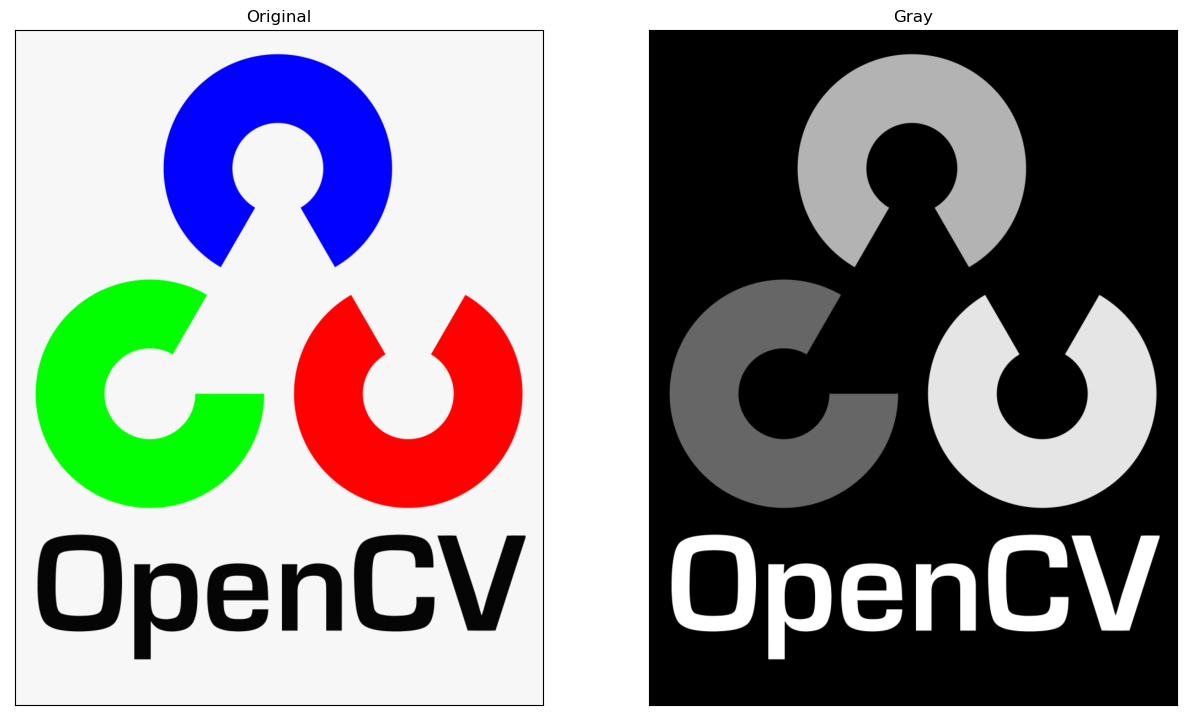

In [45]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

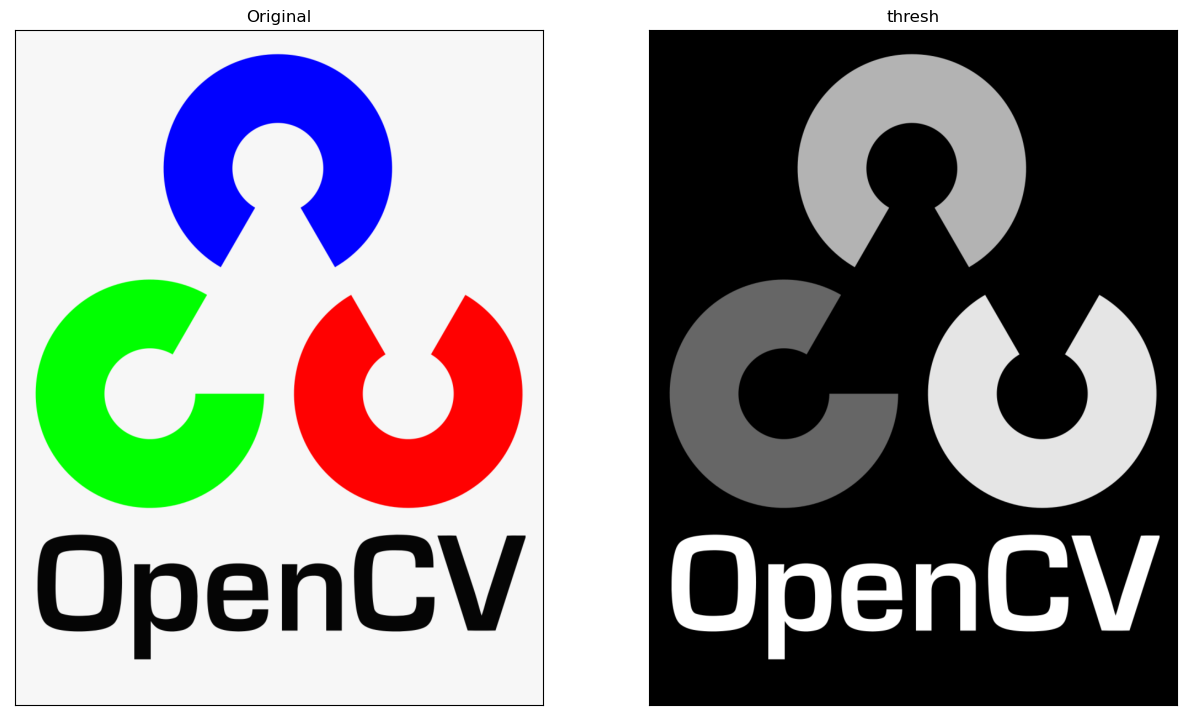

In [47]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [48]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

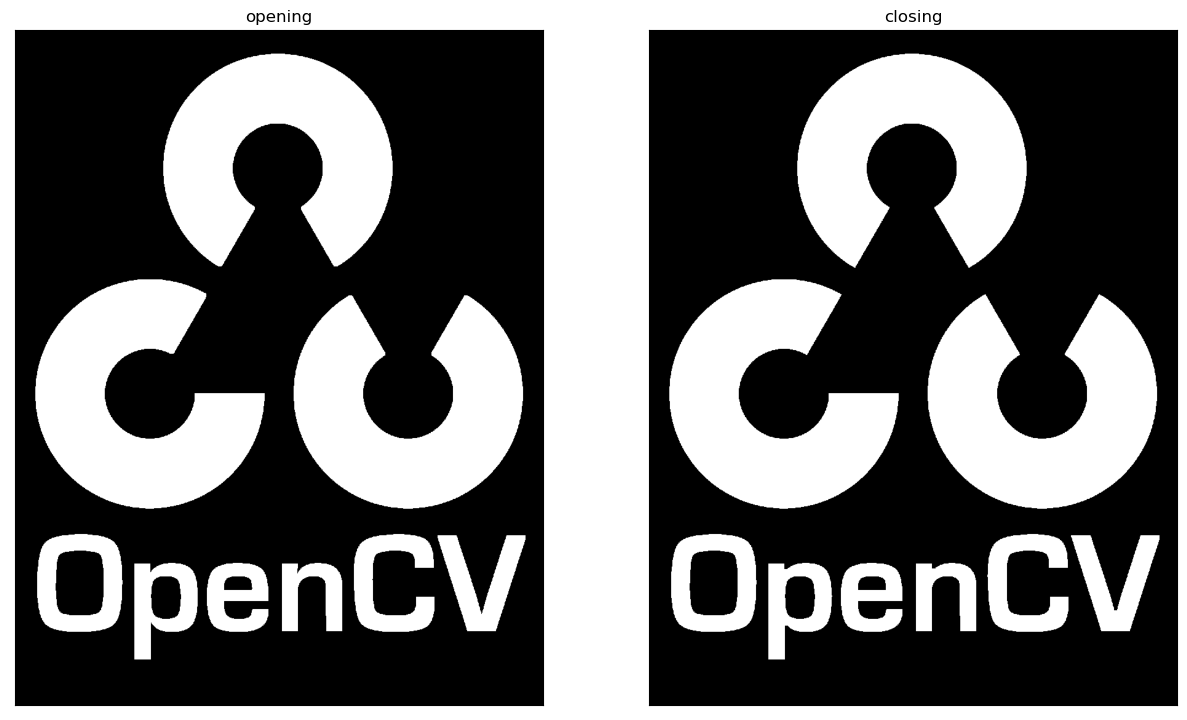

In [49]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])

plt.show()

In [50]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [51]:
imgcontour = cv2.drawContours(img, contours, -1,(255,32,32),2)
img = cv2.imread('opencv_logo.png')

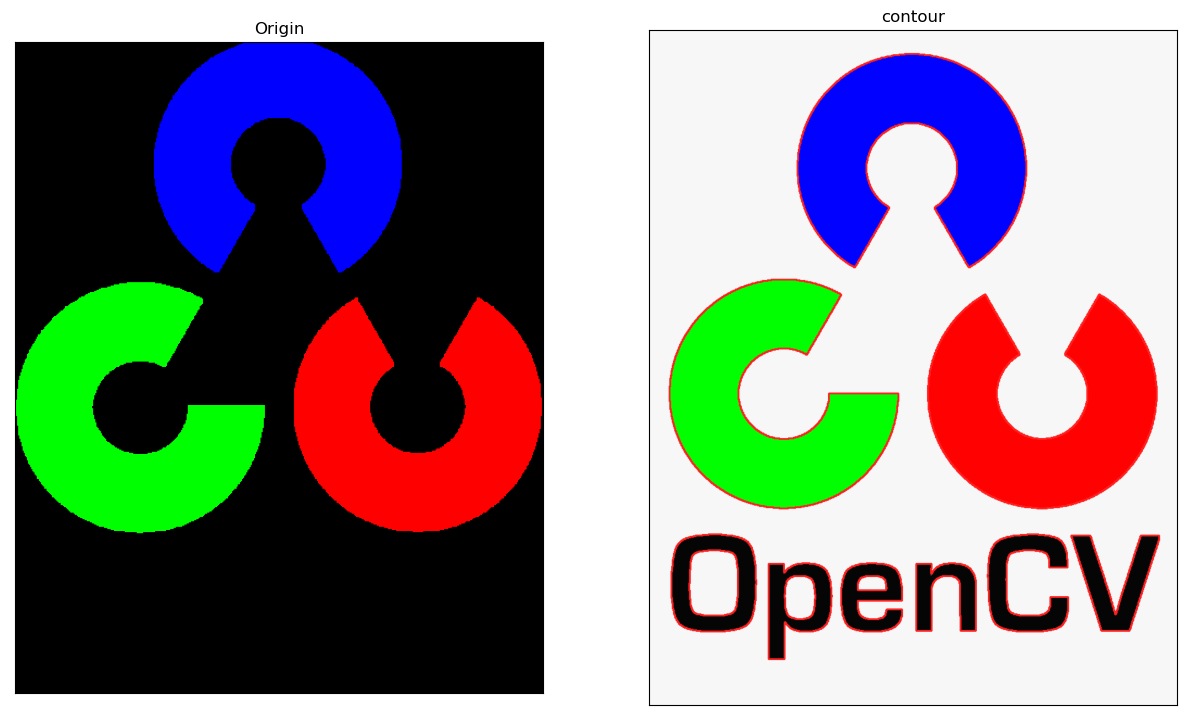

In [52]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Origin'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.show()